In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from sklearn.cluster import KMeans, AgglomerativeClustering, Birch
from sklearn.preprocessing import StandardScaler
import hvplot.pandas
from scipy.stats import linregress

In [165]:
df = pd.read_csv('melb_data.csv')

In [166]:
df = df.dropna()
df.reset_index(inplace=True)

In [167]:
# Use the StandardScaler module and fit_transform function to 
# scale all columns with numerical values
df_scaled = StandardScaler().fit_transform(df[["Rooms" , "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt"]])

# Diplay the first three rows of the scaled data
df_scaled[0:3]

array([[-0.95922445, -1.29215935, -0.92995401, -0.8102572 , -1.69227228,
        -0.35103059, -0.6888734 , -1.68182726],
       [ 0.0706412 , -1.29215935,  0.10099876,  0.59561051, -1.69227228,
        -0.37554647,  0.09282823, -1.68182726],
       [ 1.10050686, -1.29215935,  0.10099876, -0.8102572 ,  0.4585624 ,
        -0.39114749,  0.00474917,  1.31009469]])

In [168]:
df_scaled = pd.DataFrame(
    df_scaled,
    columns=["Rooms" , "Distance", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt"]
)
df_scaled

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt
0,-0.959224,-1.292159,-0.929954,-0.810257,-1.692272,-0.351031,-0.688873,-1.681827
1,0.070641,-1.292159,0.100999,0.595611,-1.692272,-0.375546,0.092828,-1.681827
2,1.100507,-1.292159,0.100999,-0.810257,0.458562,-0.391147,0.004749,1.310095
3,0.070641,-1.292159,1.131952,0.595611,-1.692272,-0.251853,0.753421,-1.419378
4,-0.959224,-1.292159,-0.929954,-0.810257,0.458562,-0.239595,-0.380597,-1.944277
...,...,...,...,...,...,...,...,...
6191,0.070641,4.588503,0.100999,0.595611,-0.616855,0.558286,0.081818,0.837686
6192,0.070641,-0.525891,0.100999,-0.810257,-1.692272,-0.325400,-0.292518,-1.944277
6193,-1.989090,-0.525891,-1.960907,-0.810257,-0.616855,-0.524870,-1.166262,0.076583
6194,-0.959224,-0.917935,-0.929954,-0.810257,-0.616855,-0.524870,-0.880445,1.257605


In [169]:
method_encoded = pd.get_dummies(df['Method'])
suburb_encoded = pd.get_dummies(df['Suburb'])
type_encoded = pd.get_dummies(df['Type'])
seller_encoded = pd.get_dummies(df['SellerG'])
zip_encoded = pd.get_dummies(df['Postcode'])
region_encoded = pd.get_dummies(df['Regionname'])

In [170]:
df_scaled_encoded = pd.concat([df_scaled, method_encoded, type_encoded, region_encoded], axis=1)

df_scaled_encoded

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PI,S,...,t,u,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
0,-0.959224,-1.292159,-0.929954,-0.810257,-1.692272,-0.351031,-0.688873,-1.681827,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.070641,-1.292159,0.100999,0.595611,-1.692272,-0.375546,0.092828,-1.681827,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1.100507,-1.292159,0.100999,-0.810257,0.458562,-0.391147,0.004749,1.310095,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0.070641,-1.292159,1.131952,0.595611,-1.692272,-0.251853,0.753421,-1.419378,0,1,...,0,0,0,0,1,0,0,0,0,0
4,-0.959224,-1.292159,-0.929954,-0.810257,0.458562,-0.239595,-0.380597,-1.944277,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6191,0.070641,4.588503,0.100999,0.595611,-0.616855,0.558286,0.081818,0.837686,0,1,...,0,0,0,0,0,1,0,0,0,0
6192,0.070641,-0.525891,0.100999,-0.810257,-1.692272,-0.325400,-0.292518,-1.944277,0,0,...,0,0,0,0,0,0,0,0,1,0
6193,-1.989090,-0.525891,-1.960907,-0.810257,-0.616855,-0.524870,-1.166262,0.076583,0,0,...,0,1,0,0,0,0,0,0,1,0
6194,-0.959224,-0.917935,-0.929954,-0.810257,-0.616855,-0.524870,-0.880445,1.257605,1,0,...,0,1,0,0,0,0,0,1,0,0


In [171]:
method_encoded

,PI,S,SA,SP,VB
0,0,1,0,0,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,1,0,0,0
...,...,...,...,...,...
6191,0,1,0,0,0
6192,0,0,0,0,1
6193,0,0,0,1,0
6194,1,0,0,0,0


In [172]:
df.groupby('Suburb').mean()


,index,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Suburb,,,,,,,,,,,,,,
Abbotsford,3177.583333,2.444444,1.125972e+06,2.597222,3067.0,2.444444,1.416667,0.916667,233.388889,108.944444,1944.638889,-37.804382,144.996653,4019.0
Aberfeldie,7307.272727,3.090909,1.365000e+06,8.881818,3040.0,2.954545,1.954545,1.727273,514.000000,152.104545,1983.181818,-37.760063,144.897146,1543.0
Airport West,2581.088235,2.911765,7.042941e+05,12.952941,3042.0,2.882353,1.558824,1.764706,349.882353,137.599118,1985.764706,-37.723238,144.879384,3464.0
Albanvale,11873.000000,3.000000,5.550000e+05,14.000000,3021.0,3.000000,1.000000,3.000000,566.000000,126.000000,1980.000000,-37.743060,144.766790,1899.0
Albert Park,2029.233333,2.666667,1.868783e+06,3.270000,3206.0,2.600000,1.500000,0.666667,152.766667,120.083333,1905.300000,-37.844453,144.952388,3280.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wollert,11056.000000,4.000000,5.625000e+05,25.500000,3750.0,4.000000,2.000000,2.000000,448.000000,262.500000,2011.500000,-37.616405,145.024245,2940.0
Wyndham Vale,10373.333333,3.666667,4.860000e+05,27.200000,3024.0,3.666667,1.666667,1.666667,551.666667,146.846667,2001.000000,-37.882543,144.612940,5262.0
Yallambie,7210.000000,3.428571,8.646786e+05,14.671429,3085.0,3.428571,1.857143,1.571429,601.500000,172.242857,1981.428571,-37.726279,145.093239,1369.0


In [173]:
# columns_to_drop = ["Lattitude", "Longtitude", "Propertycount"]
# data = clean_data.drop(columns=columns_to_drop)


In [174]:
# df['Suburb']

R squared: 0.2815085362678108


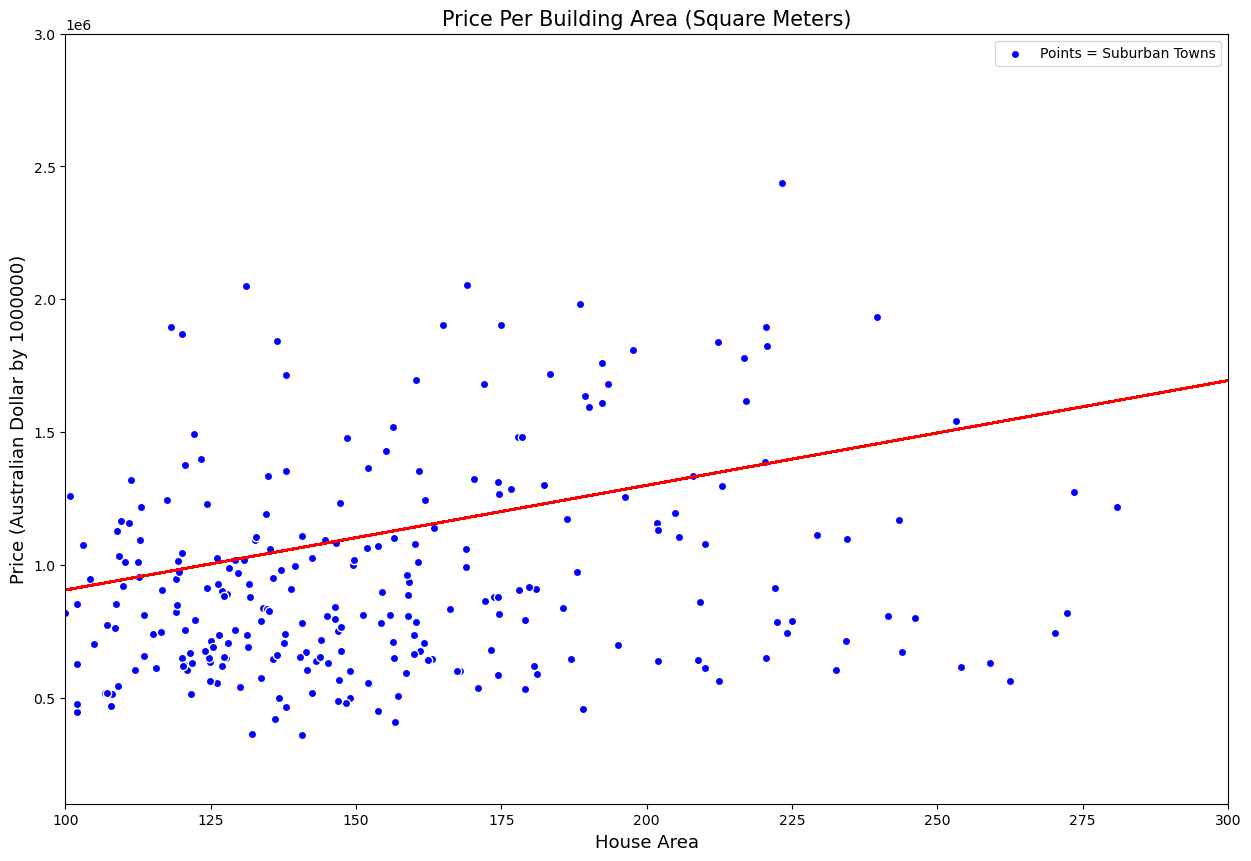

In [210]:
## Convert to floats and store BuildingArea and Price as x and y values
x_values = list(df["BuildingArea"].astype("float"))
y_values = list(df["Price"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))



# # Plot scatter plot
# ax.scatter(x_values,y_values)
# for i, txt in enumerate(list(df ['Suburb'])):
#     ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

# plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('House Area', fontsize = 13)
plt.ylabel('Price (Australian Dollar by 1000000)',fontsize = 13)
plt.title ('Price Per Building Area (Square Meters)',fontsize = 15)
plt.scatter(data["BuildingArea"], data["Price"], marker="o", facecolors="blue", edgecolors="white")


plt.xlim(100,300)
plt.ylim(100000,3000000)



# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["BuildingArea"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Suburban Towns"])



R squared: 0.006628978636766575


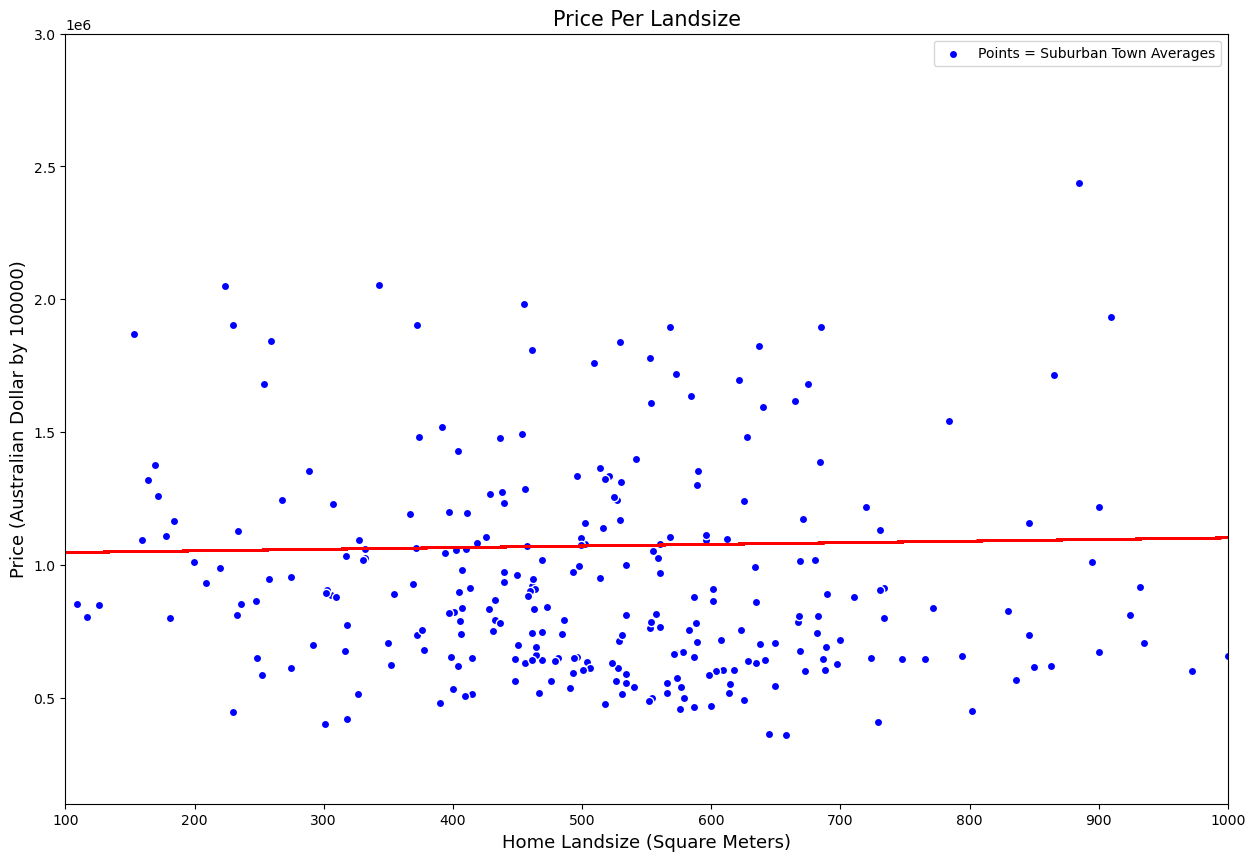

In [211]:
## Convert to floats and store Landsize and Price as x and y values
x_values = list(df["Landsize"].astype("float"))
y_values = list(df["Price"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))



# # Plot scatter plot
# ax.scatter(x_values,y_values)
# for i, txt in enumerate(list(df ['Suburb'])):
#     ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

# plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Home Landsize (Square Meters)', fontsize = 13)
plt.ylabel('Price (Australian Dollar by 100000)',fontsize = 13)
plt.title ('Price Per Landsize',fontsize = 15)
plt.scatter(data["Landsize"], data["Price"], marker="o", facecolors="blue", edgecolors="white")


plt.xlim(100,1000)
plt.ylim(100000,3000000)



# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Landsize"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Suburban Town Averages"])



R squared: 0.2846279651270384


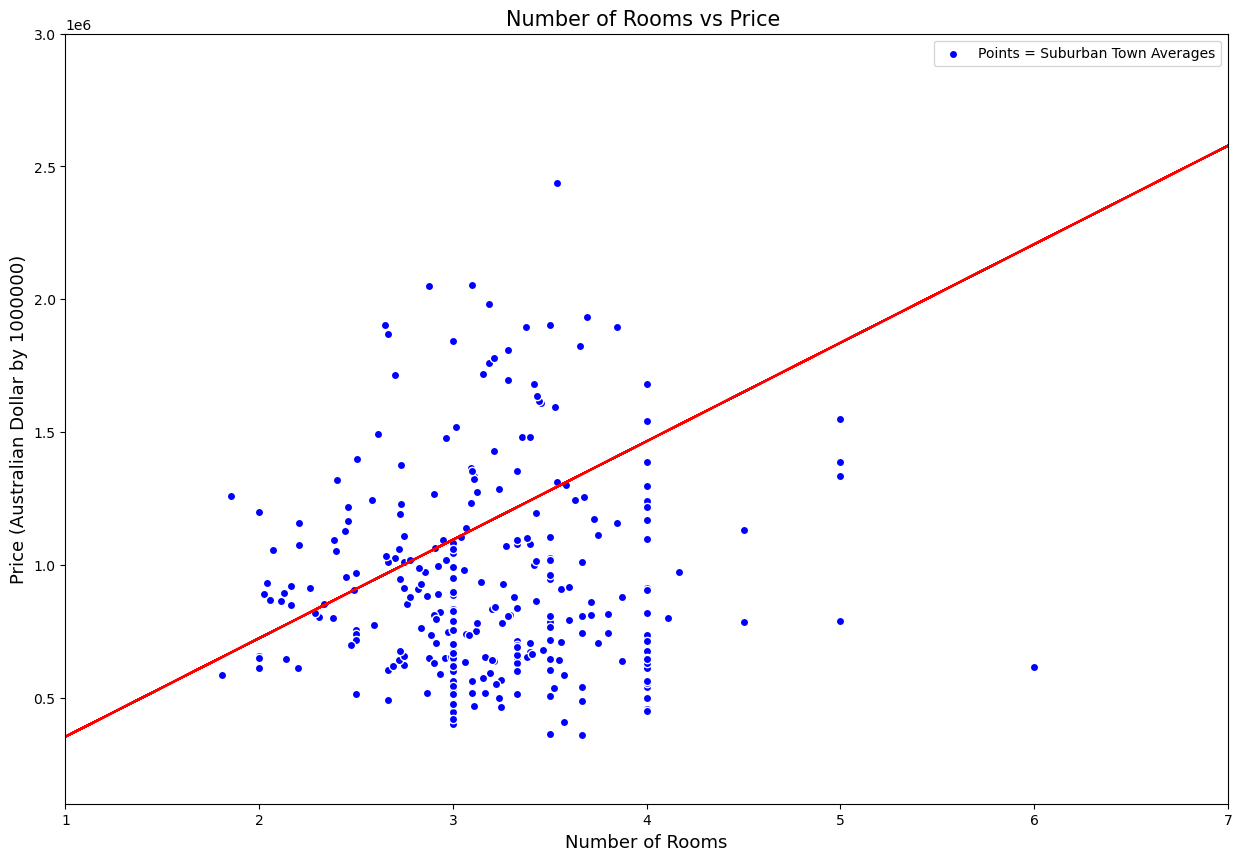

In [206]:
## Convert to floats and store Landsize and Price as x and y values
x_values = list(df["Rooms"].astype("float"))
y_values = list(df["Price"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))



# # Plot scatter plot
# ax.scatter(x_values,y_values)
# for i, txt in enumerate(list(df ['Suburb'])):
#     ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

# plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Number of Rooms', fontsize = 13)
plt.ylabel('Price (Australian Dollar by 1000000)',fontsize = 13)
plt.title ('Number of Rooms vs Price ',fontsize = 15)
plt.scatter(data["Rooms"], data["Price"], marker="o", facecolors="blue", edgecolors="white")


plt.xlim(1,7)
plt.ylim(100000,3000000)



# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Rooms"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Suburban Town Averages"])


R squared: 0.02547299499511583


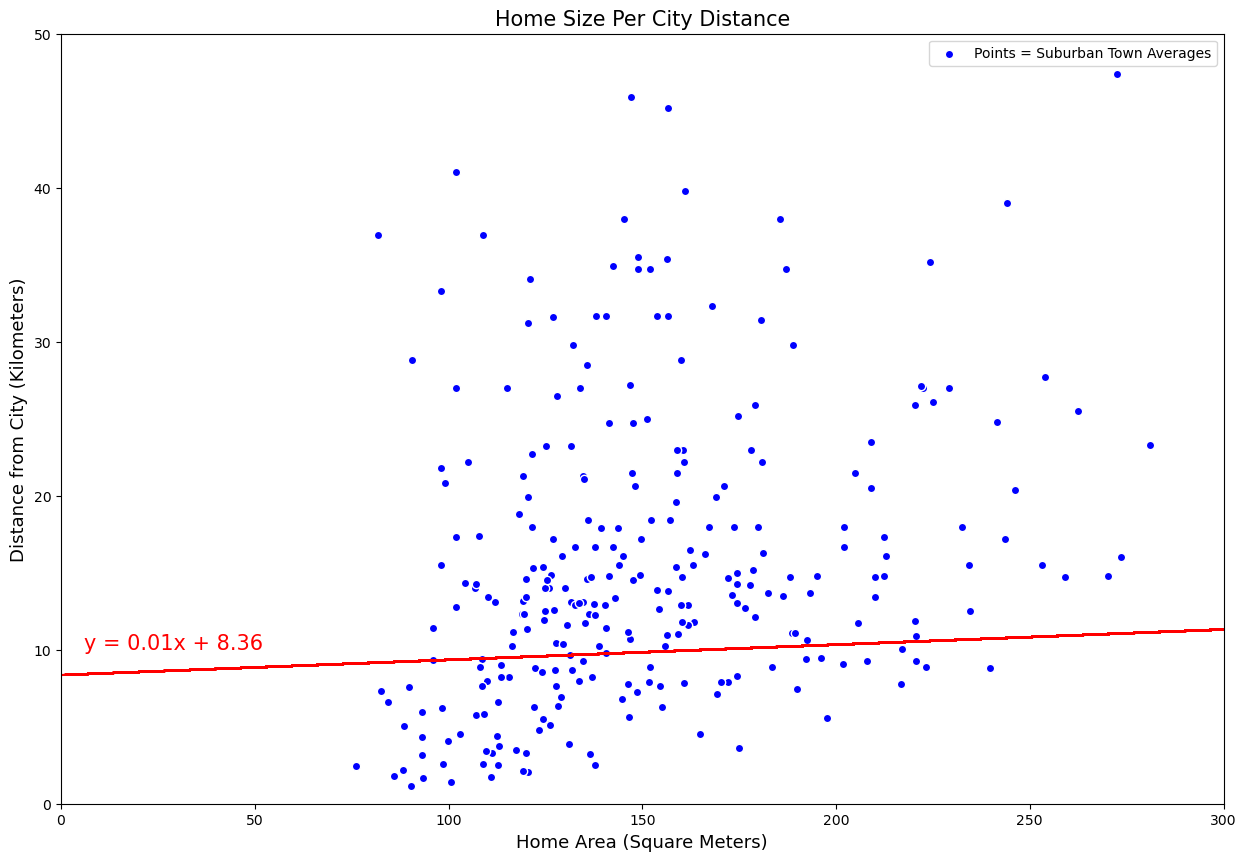

In [212]:
## Convert to floats and store Distance and Price as x and y values
x_values = list(df["BuildingArea"].astype("float"))
y_values = list(df["Distance"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))



# # Plot scatter plot
# ax.scatter(x_values,y_values)
# for i, txt in enumerate(list(df ['Suburb'])):
#     ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

# plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Home Area (Square Meters)', fontsize = 13)
plt.ylabel('Distance from City (Kilometers)',fontsize = 13)
plt.title ('Home Size Per City Distance',fontsize = 15)
plt.scatter(data["BuildingArea"], data["Distance"], marker="o", facecolors="blue", edgecolors="white")


plt.xlim(0,300)
plt.ylim(0,50)




# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["BuildingArea"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Suburban Town Averages"])


R squared: 0.022161337930082358


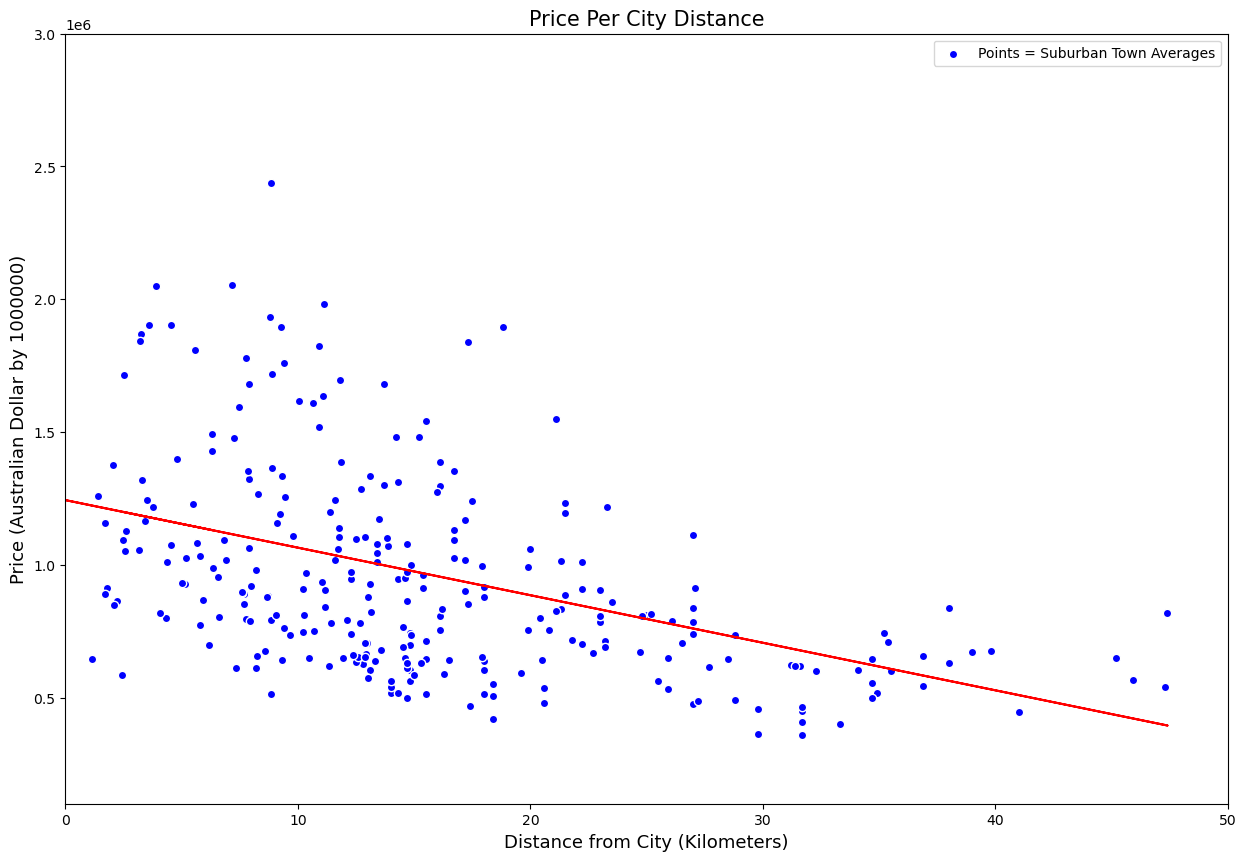

In [201]:
## Convert to floats and store Distance and Price as x and y values
x_values = list(df["Distance"].astype("float"))
y_values = list(df["Price"].astype("float"))


fig, ax = plt.subplots(figsize = (15, 10))



# # Plot scatter plot
# ax.scatter(x_values,y_values)
# for i, txt in enumerate(list(df ['Suburb'])):
#     ax.annotate(txt, (list(x_values)[i], list(y_values)[i]), fontsize = 12, fontweight = "bold")

# plt.scatter(x_values, y_values, s=7)


# Label plot
plt.xlabel('Distance from City (Kilometers)', fontsize = 13)
plt.ylabel('Price (Australian Dollar by 1000000)',fontsize = 13)
plt.title ('Price Per City Distance',fontsize = 15)
plt.scatter(data["Distance"], data["Price"], marker="o", facecolors="blue", edgecolors="white")


plt.xlim(0,50)
plt.ylim(100000,3000000)



# Linear regression

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = df["Distance"] * slope + intercept

line_eq = "y = "+ str(round(slope,2)) + "x + " + str(round(intercept, 2))

plt.plot(x_values, regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")


print(f"R squared: {rvalue**2}")


plt.legend(["Points = Suburban Town Averages"])


## Fit and Predict with KMeans

In [202]:
# Initialize the K-Means model with n_clusters=3
model = KMeans(n_clusters=3)

# Fit the model for the rate_df_scaled DataFrame
model.fit(df_scaled_encoded)

# Save the predicted model clusters to a new DataFrame.
value_clusters = model.predict(df_scaled_encoded)

# View the country clusters
print(value_clusters)

/Users/sammy2/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 1 1 ... 0 0 2]


In [203]:
# Create a copy of the concatenated DataFrame
df_scaled_encoded_predictions = df_scaled_encoded.copy()

# Create a new column in the copy of the concatenated DataFrame with the predicted clusters
df_scaled_encoded_predictions["ValueCluster"] = value_clusters

# Review the DataFrame
df_scaled_encoded_predictions.head()

,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,PI,S,...,u,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria,ValueCluster
0,-0.959224,-1.292159,-0.929954,-0.810257,-1.692272,-0.351031,-0.688873,-1.681827,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0.070641,-1.292159,0.100999,0.595611,-1.692272,-0.375546,0.092828,-1.681827,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1.100507,-1.292159,0.100999,-0.810257,0.458562,-0.391147,0.004749,1.310095,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.070641,-1.292159,1.131952,0.595611,-1.692272,-0.251853,0.753421,-1.419378,0,1,...,0,0,0,1,0,0,0,0,0,1
4,-0.959224,-1.292159,-0.929954,-0.810257,0.458562,-0.239595,-0.380597,-1.944277,0,1,...,0,0,0,1,0,0,0,0,0,0


In [204]:
df_scaled_encoded_predictions.hvplot.scatter(
    x="Bedroom2",
    y="Bathroom",
    by="ValueCluster"
)

:NdOverlay   [ValueCluster]
   :Scatter   [Bedroom2]   (Bathroom)